# Sensors data visual report using FFT

In [1]:
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft
from scipy import signal
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from numpy import fft as npfft
import pylab as pl
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter

# Frequency analyses

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
df=pd.read_csv('data_zero.csv')
# ---------------
speed = 10
# ---------------

In [3]:
def taking_of_nan_values_DF(dfx):
    # interpolation
    dfx = dfx.interpolate(method='linear', limit_direction='forward', axis=0)
    # taking of nullmi
    dfx = dfx.fillna(method='ffill')
    dfx = dfx.fillna(method='bfill')
    return dfx

In [4]:
df = taking_of_nan_values_DF(df)

### FFT - Fourier Transforms

In [5]:
def FFT_chart(df):  
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x=df[str(column)]
            x=x.to_numpy()
            t=df[df.columns[0]]
            N = np.int(np.prod(t.shape))
            Fs = 1/(t[1]-t[0])
            T = 1/Fs
            #   FFT-----------------------------------------------------------
            plt.figure(figsize=(14,5))
            xf = np.linspace(0.0, 100.0/(2.0*T), N//2)
            yf = fft(x)
            plt.plot(xf, 2.0/N * np.abs(yf[0:np.int(N/2)]),color='c')
            plt.grid()
            plt.ylim( (0, 0.01) )
            plt.title('Frequency sensor ' + str(column),size=16)
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitud')

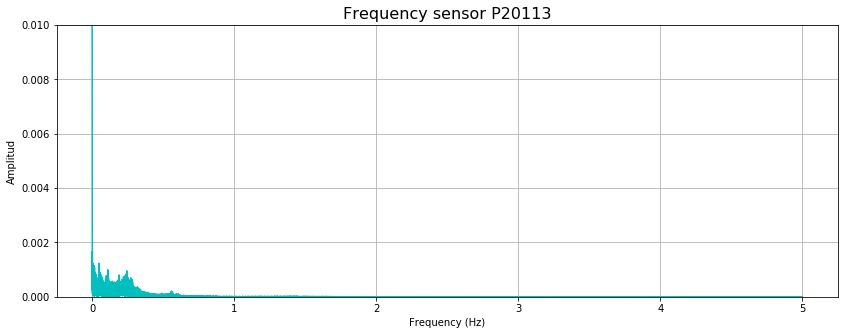

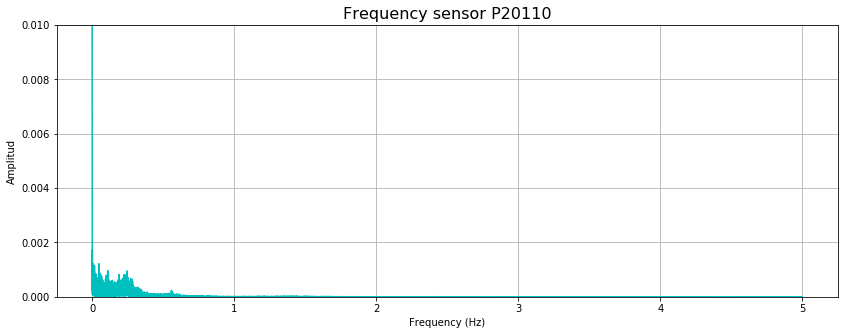

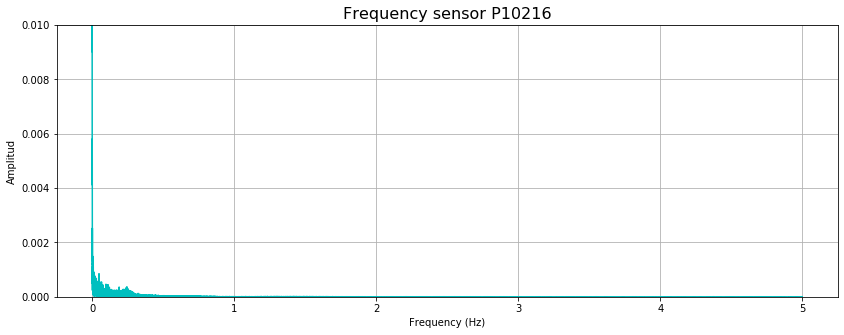

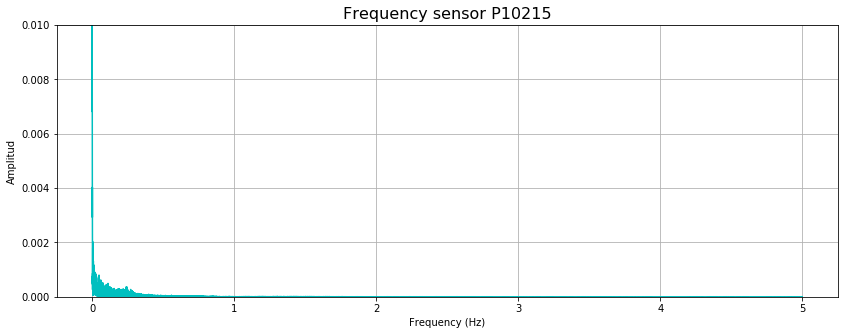

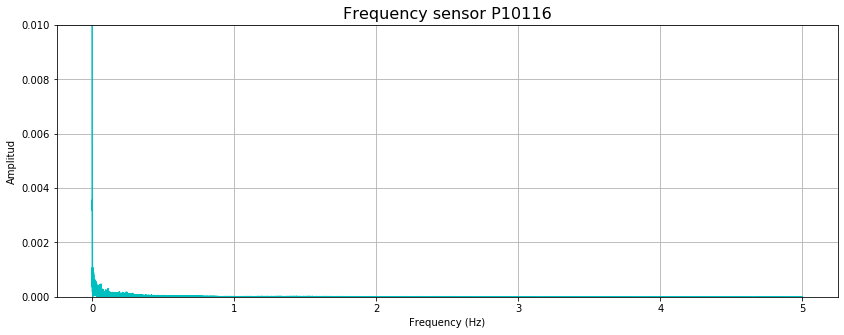

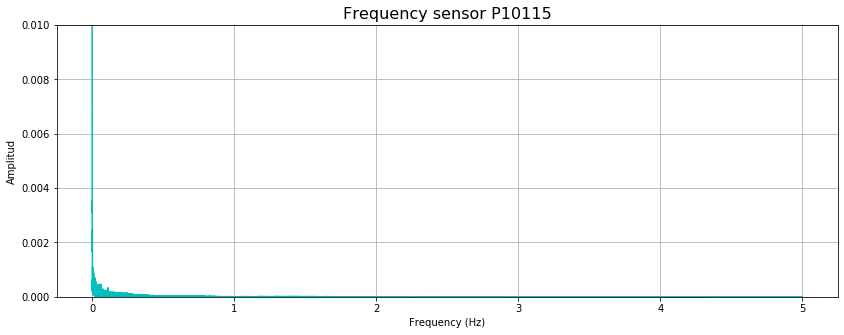

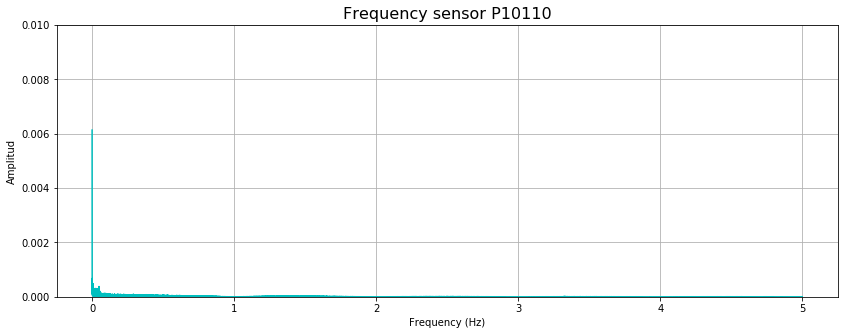

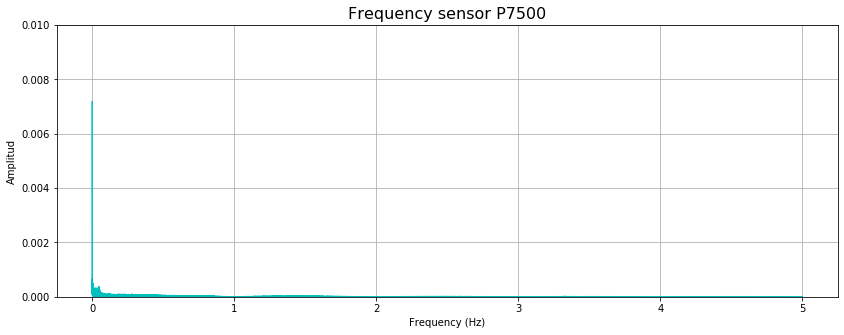

In [6]:
FFT_chart(pd.DataFrame(df))

In [7]:
# https://www.youtube.com/watch?v=DUznmZvSQOU
# https://www.youtube.com/watch?v=0TH5SLghYPY
# https://www.youtube.com/watch?v=w-6O090Fp7w
# https://www.youtube.com/watch?v=j2L-ovtEMPA
# https://www.youtube.com/watch?v=-RY_0AviWe4
# https://www.youtube.com/watch?v=8hBeeZ1Pvsg
    

In [8]:
## Filtering noise

In [9]:
def filter_plot(df):  
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x=df[str(column)]
            x=x.to_numpy()
            t=df[df.columns[0]]
            t=t.to_numpy()
            N = np.int(np.prod(t.shape))
            Fs = 1/(t[1]-t[0])
            T = 1/Fs
            t =  pd.to_datetime(df[df.columns[0]]/1000, unit='s')
            w = savgol_filter(x, 301, 2)
            plt.figure(figsize=(14,4))
            plt.plot(t, w, 'b',color='red')
            plt.title('Filtered plot ' + str(column),size=16)
            plt.xlabel('time')
            plt.ylabel('Value')
            plt.grid()


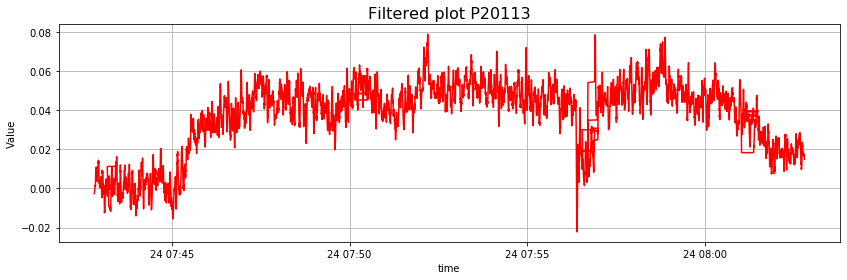

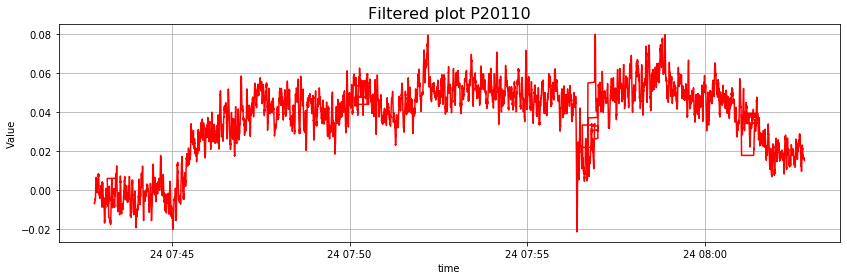

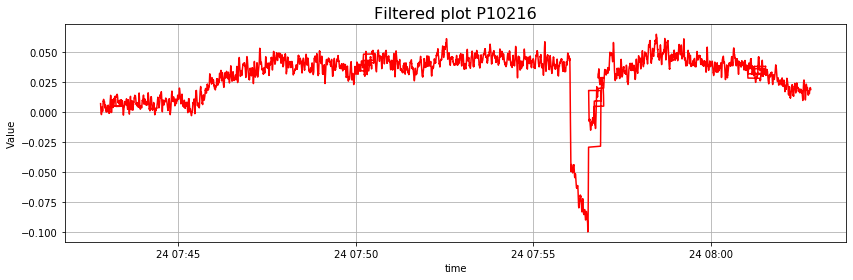

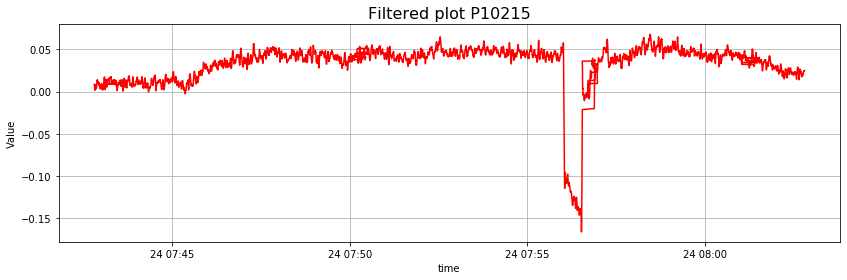

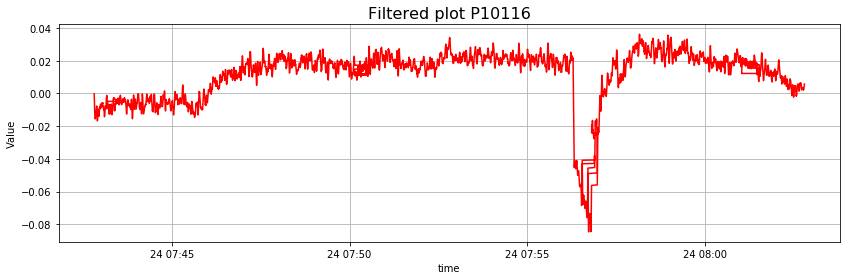

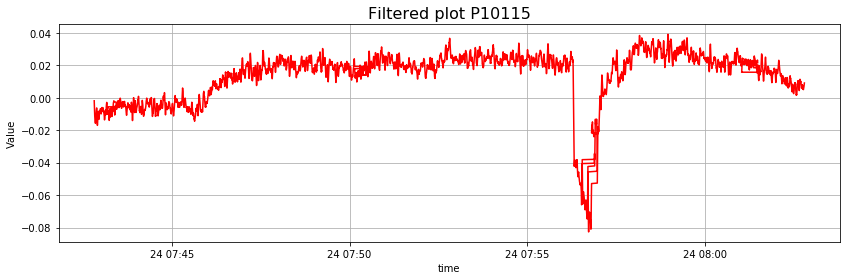

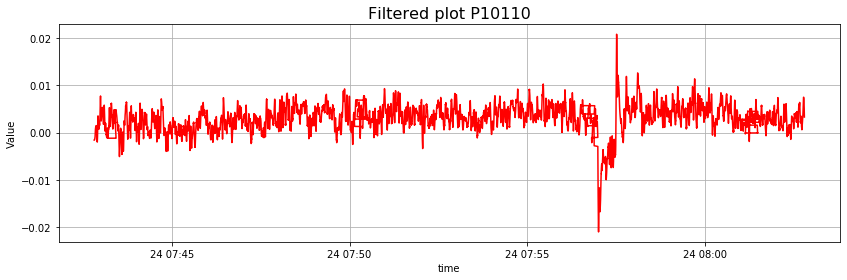

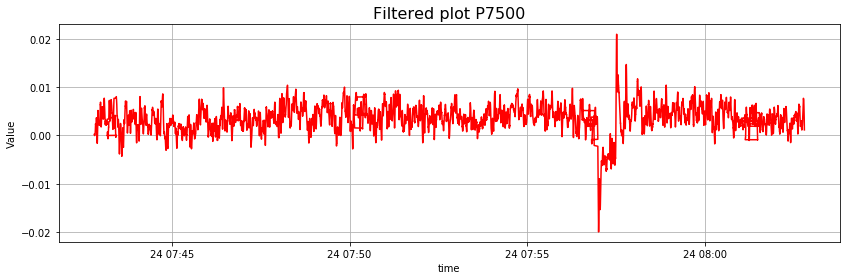

In [10]:
filter_plot(pd.DataFrame(df))

In [11]:
# Spectrogram

In [12]:
def spectrogram_plot(df):  
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x=df[str(column)]
            x=x.to_numpy()
            t=df[df.columns[0]]
            t=t.to_numpy()
            N = np.int(np.prod(t.shape))
            Fs = 1/(t[1]-t[0])
            T = 1/Fs
            t =  pd.to_datetime(df[df.columns[0]]/1000, unit='s')

            plt.figure(figsize=(14,4))
            f, t, Sxx = signal.spectrogram(x.T, Fs)
            plt.pcolormesh(t, f, Sxx, shading='gouraud')
            plt.ylim( (0, 0.0005) )
            plt.title('Spektrography ' + str(column),size=16)
            plt.xlabel('time')
            plt.ylabel('frequancy')
            plt.grid()

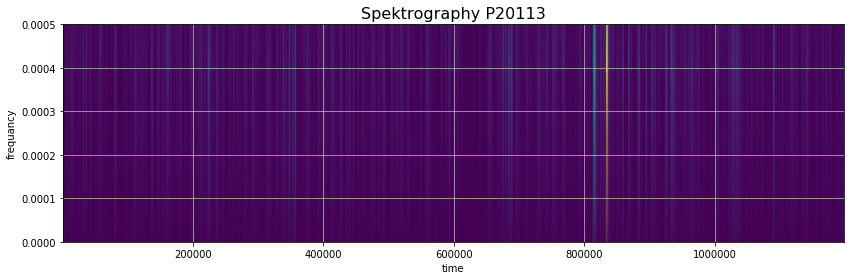

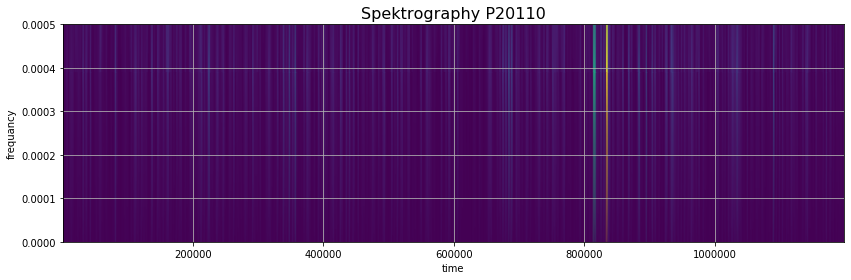

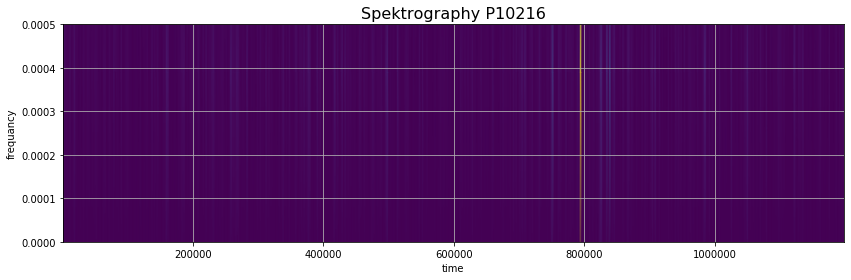

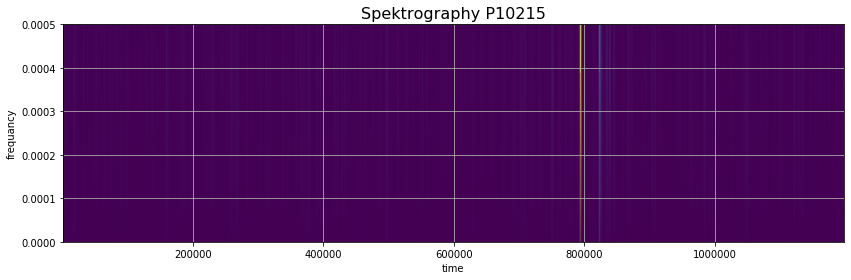

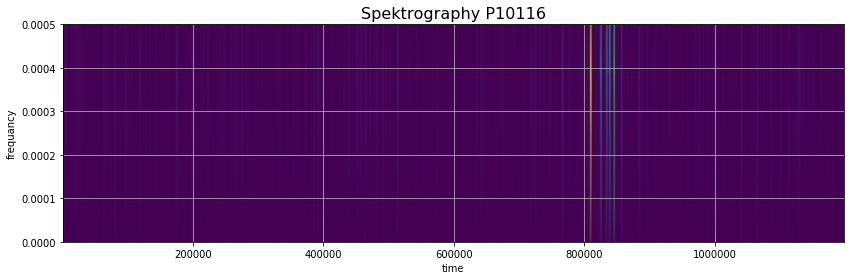

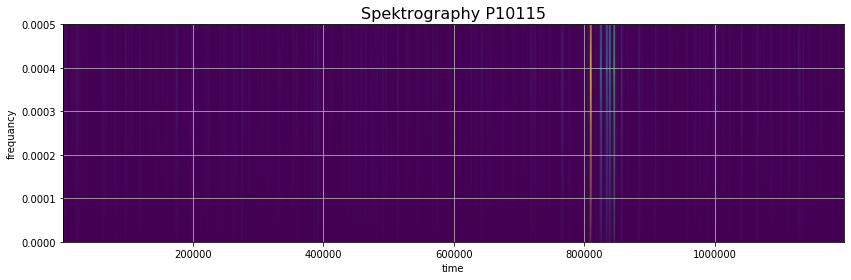

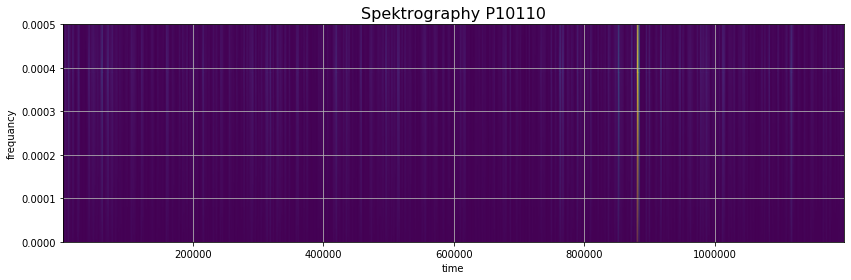

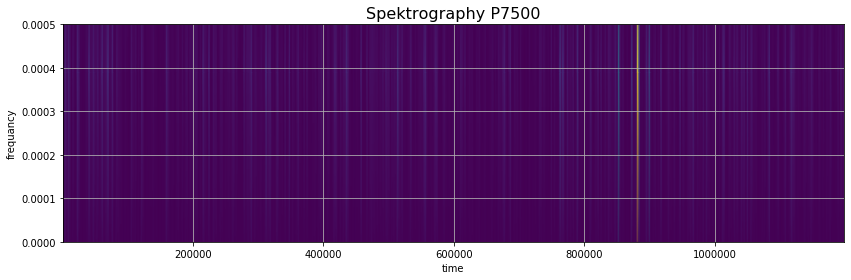

In [13]:
spectrogram_plot(pd.DataFrame(df))

In [14]:
def anomaly_detection_dynamic_plot(df):
#   https://medium.com/@krzysztofdrelczuk/time-series-anomaly-detection-with-python-example-a92ef262f09a
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            data = df[str(column)]
            data_column = data
            N = len(data)
            time = pd.to_datetime(df[df.columns[0]]/1000, unit='s')
#             np.arange(0,N)
            # (len(data),len(time))
            data_column = data_column.to_numpy() 
            window_percentage = 10
            k = int(len(data) * (window_percentage/100))
            std_div_koef = 3                            
            get_bands = lambda data : (np.mean(data) + std_div_koef * np.std(data),np.mean(data) - std_div_koef * np.std(data)) # 3 std devs

            # why there are if statements in providing indexes to range selector. It is there to handle boundary cases and avoid negative indexes and greater than size of whole data list
            bands = [get_bands(data_column[range(
                (0 if i-k < 0 else i-k),
                (i+k if i+k < N else N)
              )]) for i in range(0,N)]
            upper, lower = zip(*bands)

            # compute local outliers
            anomalies = (data_column > upper) | (data_column < lower)

            # plotting...
            plt.figure(figsize=(14,4))
            plt.title(f'Anomaly detection, column={column}, window_percentage={window_percentage}, std_div_koef={std_div_koef} ',size=16)

            plt.plot(time,data,'k',label='Data')
            plt.plot(time,upper,'r-',label='Bands',alpha=0.7) 
            plt.plot(time,lower,'r-',alpha=0.7)

            plt.plot(time[anomalies],data_column[anomalies],'ro',label='Anomalies')
            plt.fill_between(time, upper, lower,facecolor='red',alpha=0.1)
            plt.legend()

            #  plt.show()

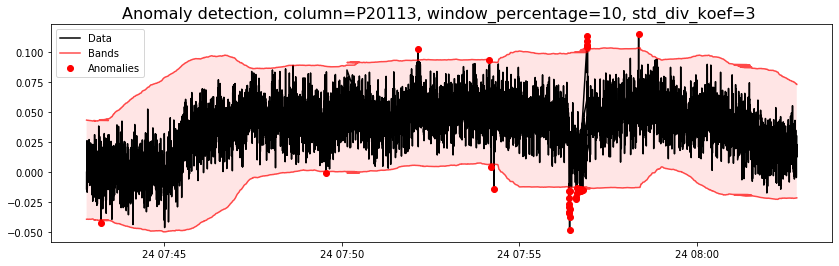

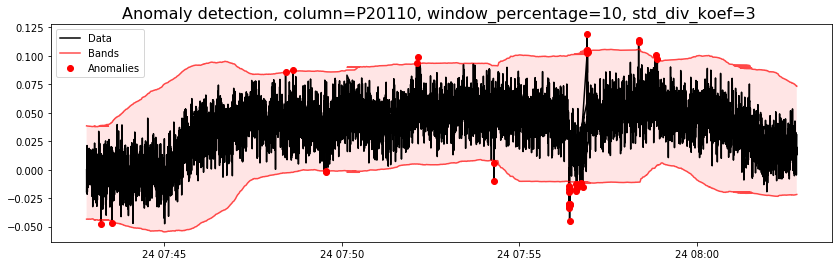

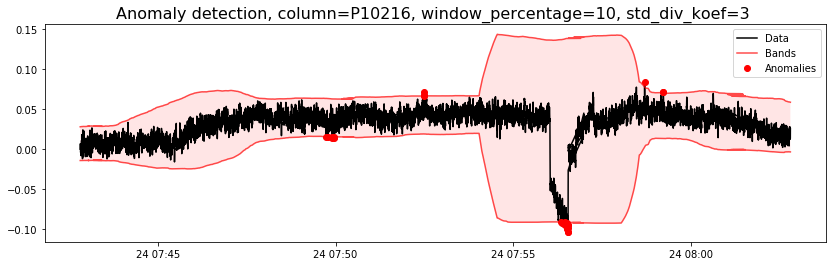

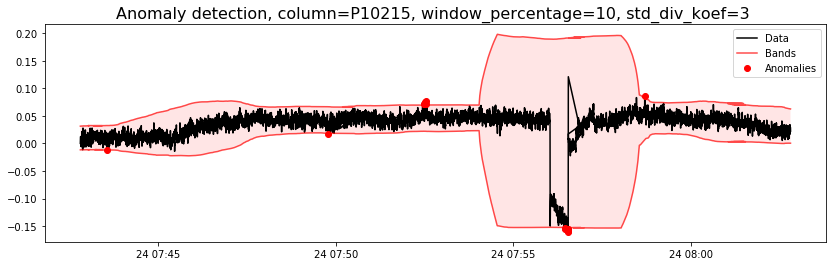

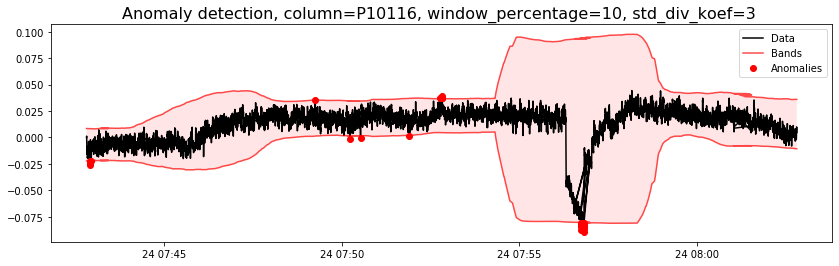

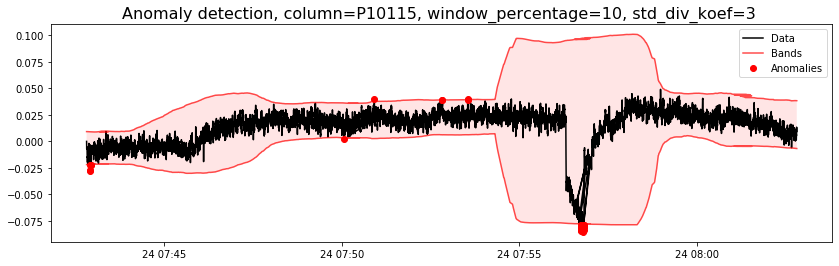

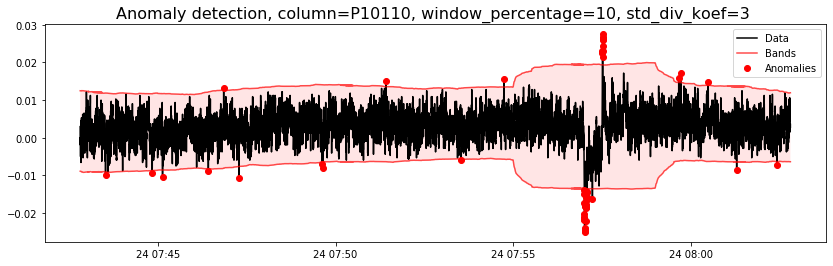

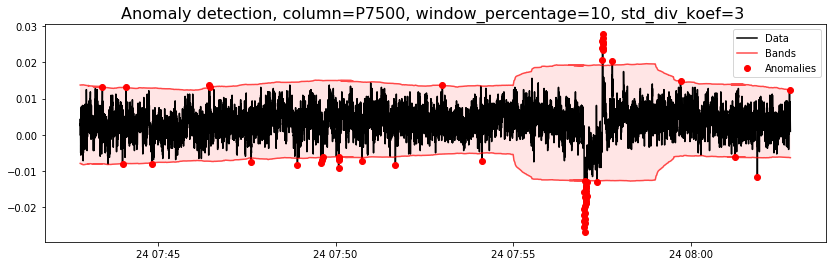

In [15]:
anomaly_detection_dynamic_plot(pd.DataFrame(df[::speed]))

# Autocorelation plot

# Fourier_extrapolation with prediction plot

In [16]:
def fourierExtrapolation(x, n_harmonics, n_predict):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)  # find linear trend in x
    x_notrend = x - p[0] * t  # detrended x
    x_freqdom = npfft.fft(x_notrend)  # detrended x in frequency domain
    f = npfft.fftfreq(n)  # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    sorted(indexes, key=lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harmonics * 2]:
        ampli = np.absolute(x_freqdom[i]) / n  # amplitude
        phase = np.angle(x_freqdom[i])  # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

In [17]:
def fourier_extrapolation_start(df):
    xpd = df
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x = xpd[str(column)]
            extrapolation = fourierExtrapolation(x, n_harmonics=int(len(df)/10), n_predict=int(len(df)/10))
            pl.figure(figsize=(25, 8))
            plt.title(f'fourier_extrapolation, column={column}', size=16)
            pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label='extrapolation')
            pl.plot(np.arange(0, x.size), x, 'b', label='x', linewidth=1)
            plt.legend()
           # plt.show()

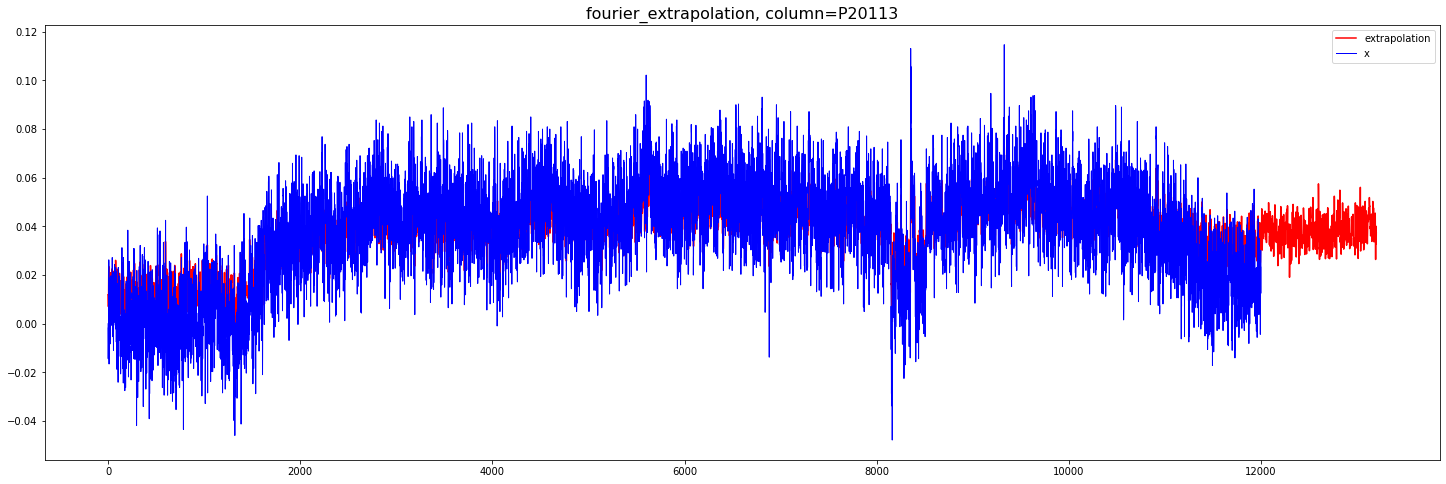

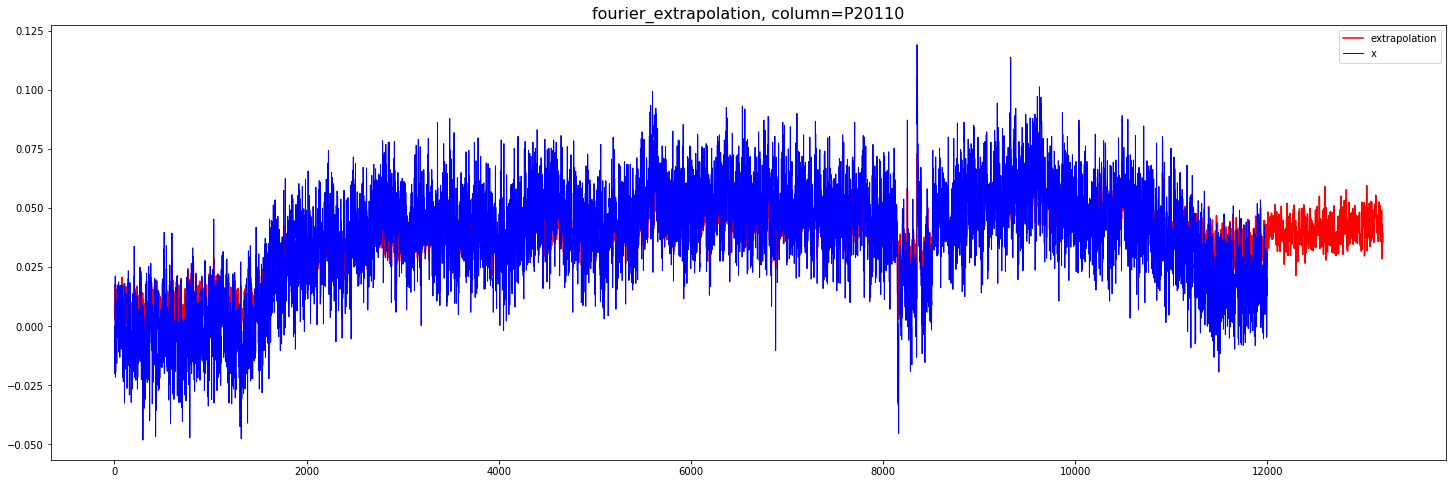

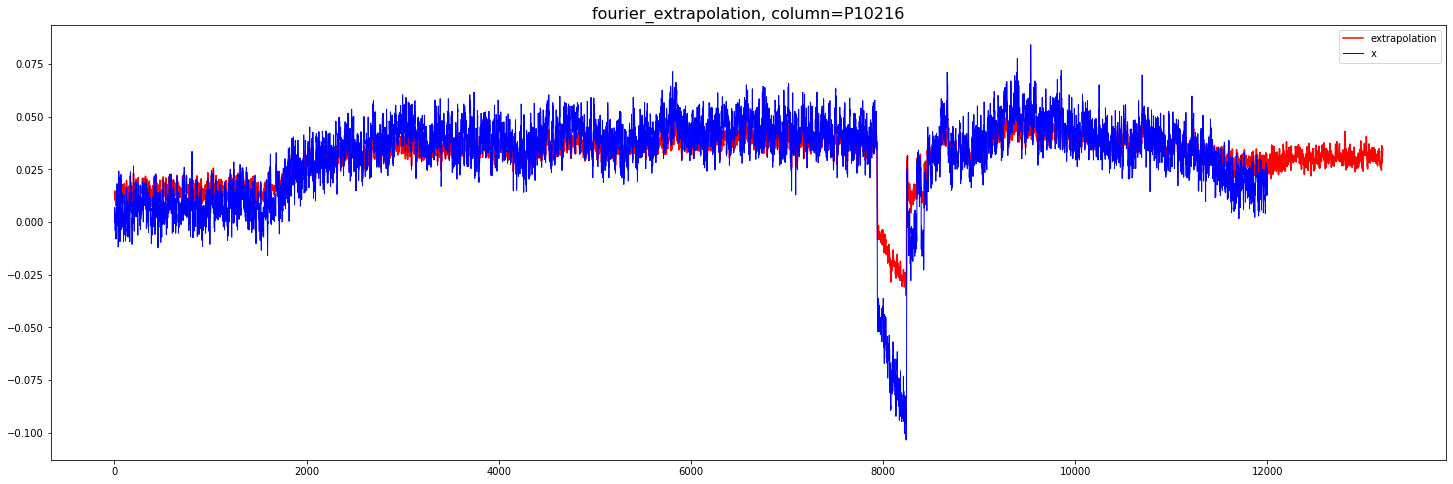

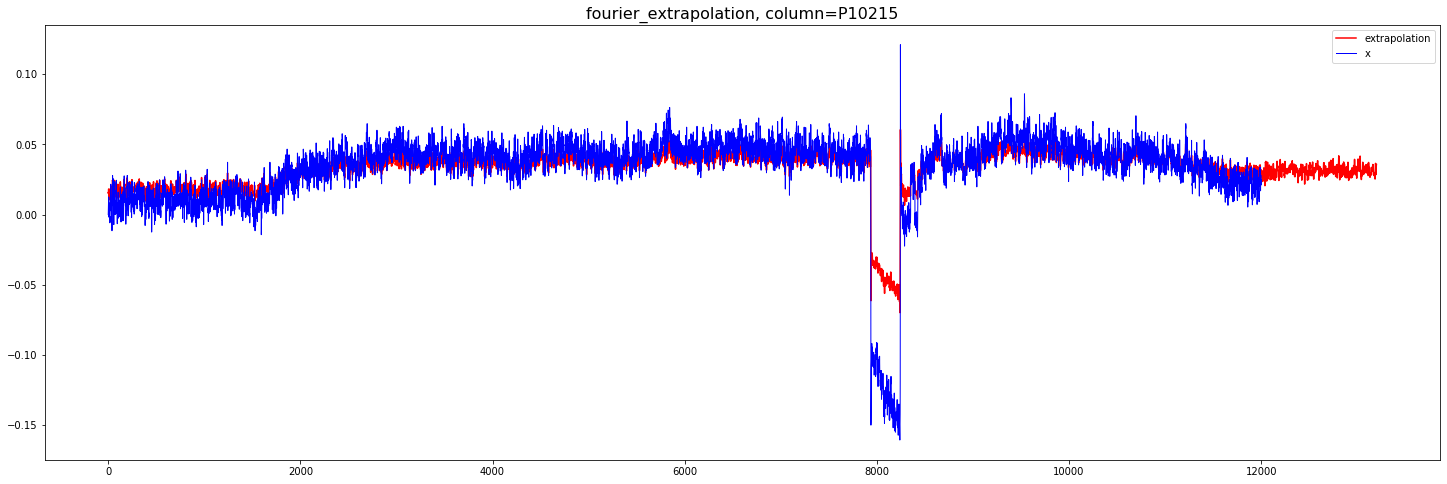

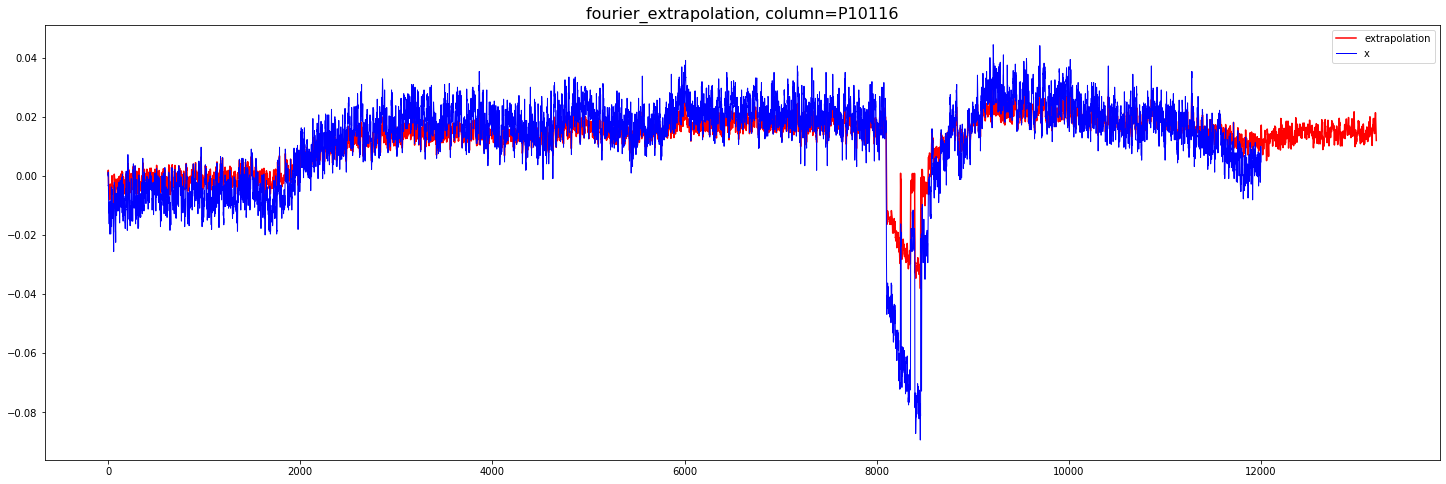

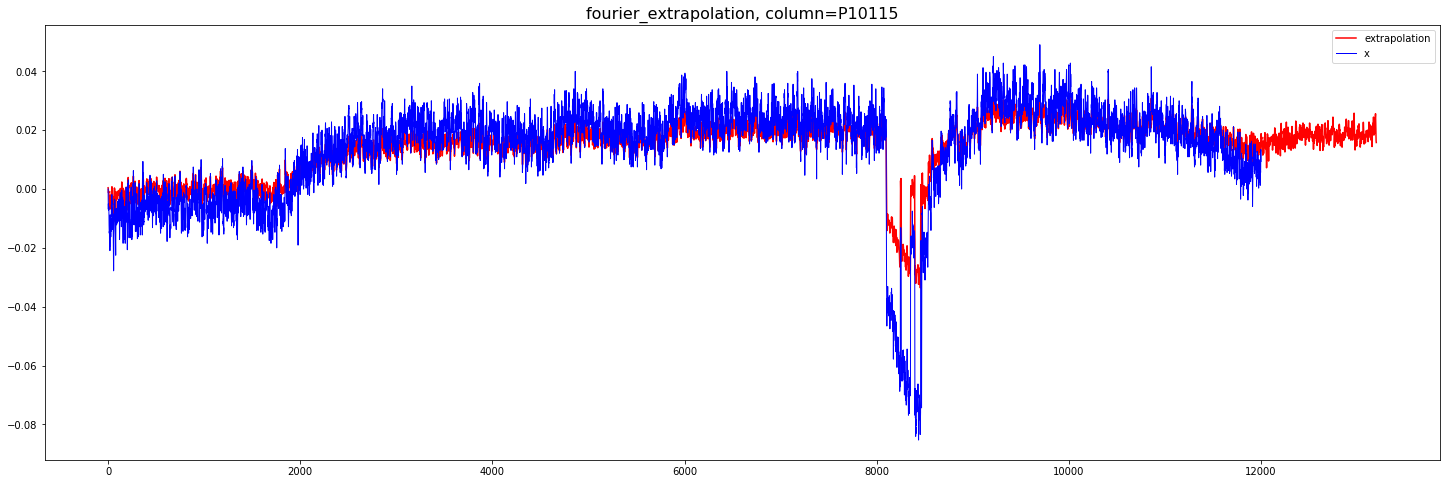

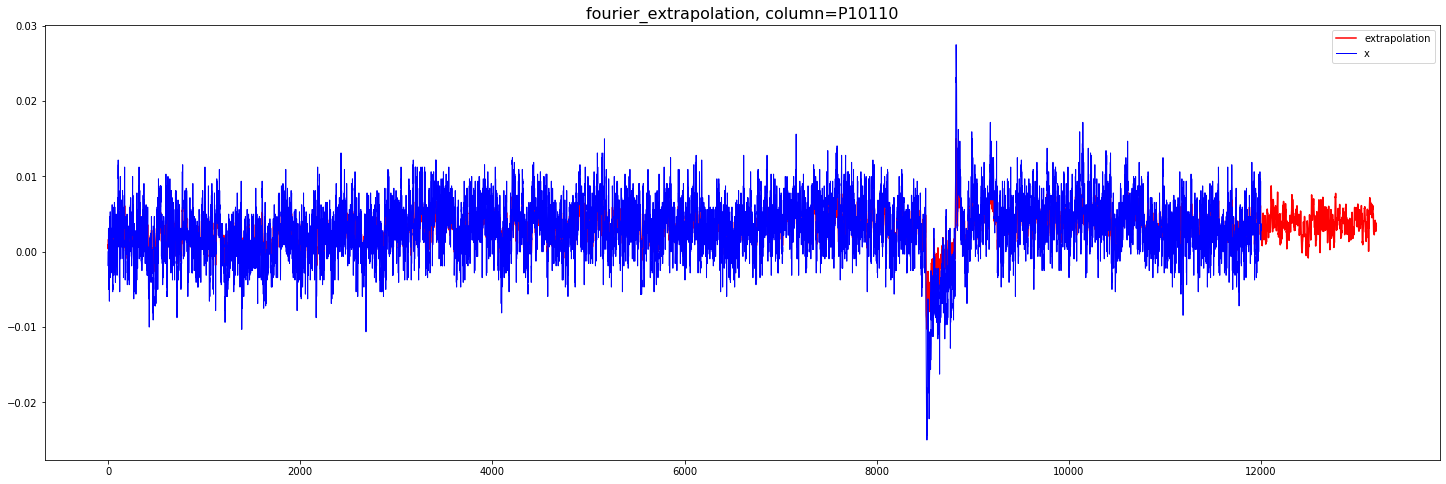

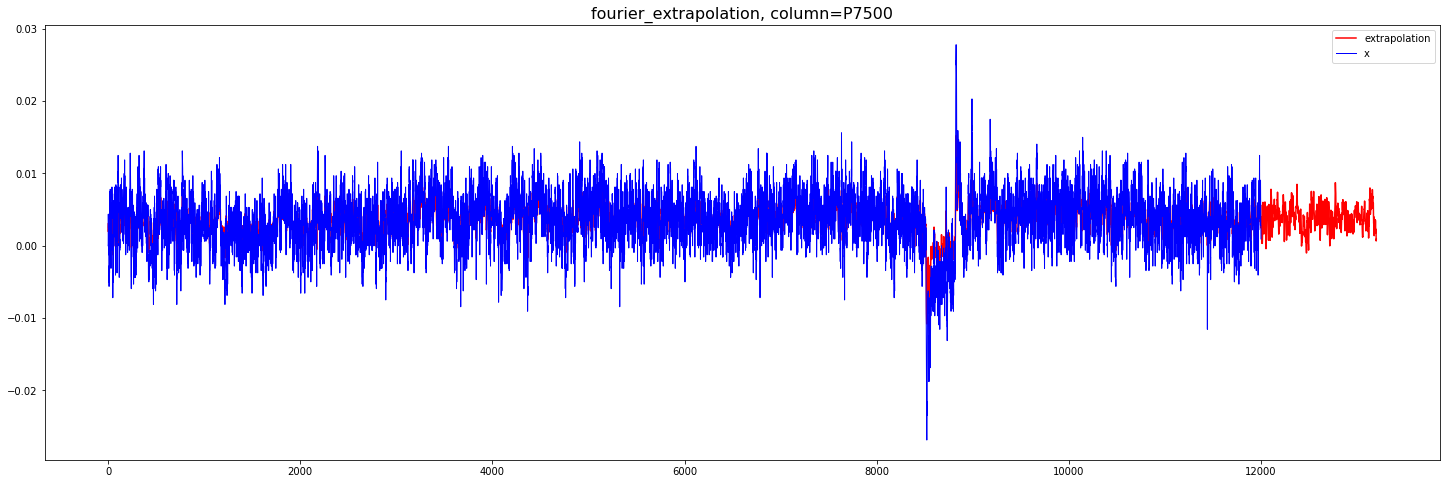

In [18]:
fourier_extrapolation_start(pd.DataFrame(df[::speed]))

[1.         0.99724379 0.98954019 0.97720637 0.96070435 0.94059996
 0.9175306  0.8921825  0.86527002 0.83750403 0.80955657 0.78204499
 0.75542915 0.73009987 0.70637485 0.68451006 0.66471852 0.64717381
 0.63201542 0.61935147 0.60926216 0.60180082 0.59698368 0.59478548
 0.595127   0.5978685  0.60280029 0.60964495 0.61806007 0.62765095
 0.63799152 0.64863799 0.65915377 0.66912209 0.67816597 0.68596705
 0.69227683 0.69692708 0.69983527 0.70099308 0.70045255]


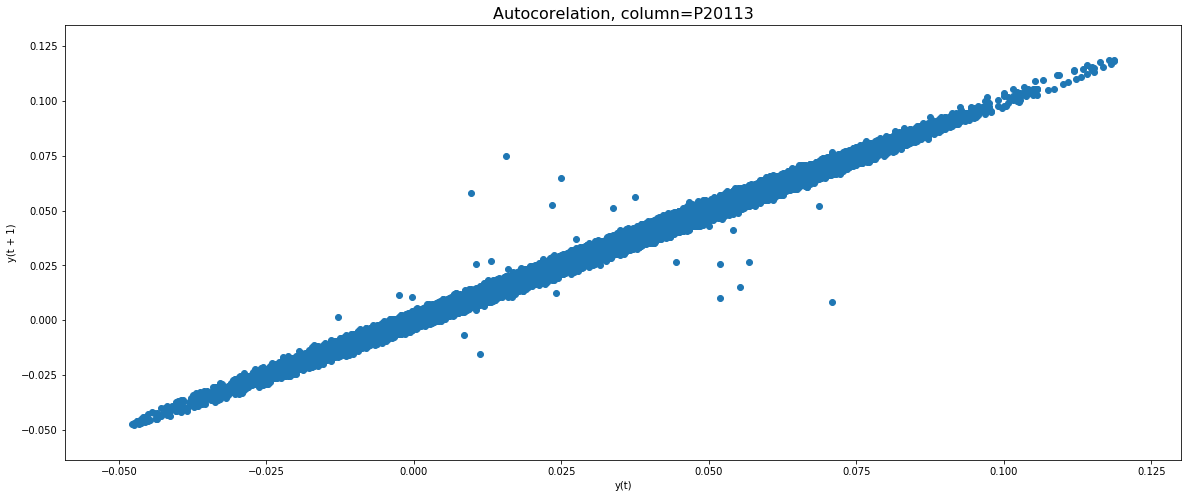

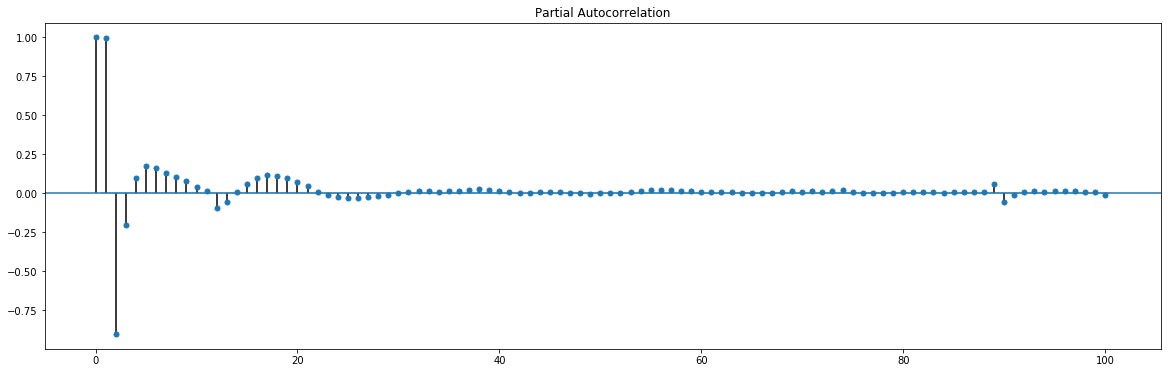

[1.         0.99754613 0.99065625 0.97962445 0.96486655 0.94689554
 0.92628207 0.90363957 0.87961026 0.8548323  0.82990926 0.80539657
 0.78169835 0.75915248 0.73803419 0.71856586 0.70093271 0.68528715
 0.67175318 0.66042816 0.65138519 0.64467112 0.64030577 0.63827358
 0.63851184 0.64090029 0.64525557 0.65133207 0.65882054 0.66736631
 0.67658545 0.68608048 0.69545619 0.70433801 0.71238492 0.71930814
 0.7248863  0.72897044 0.73149124 0.73244517 0.7318826 ]


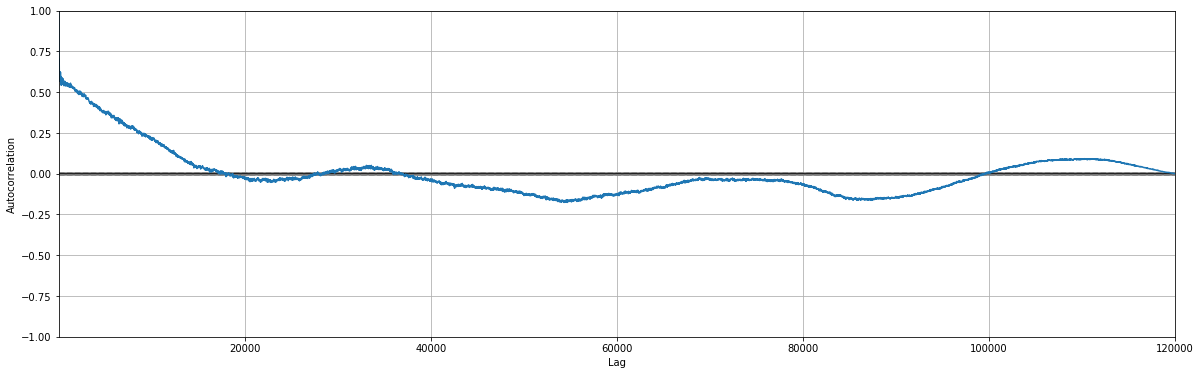

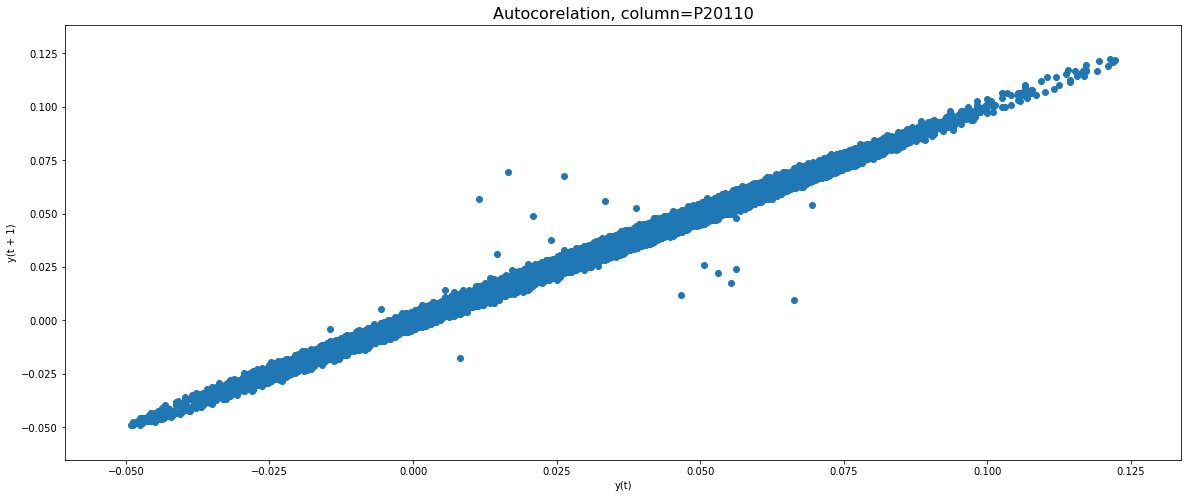

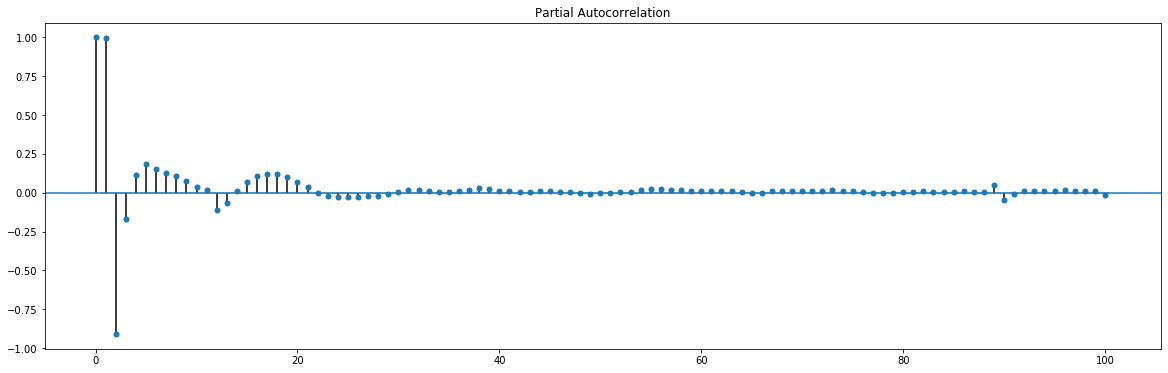

[1.         0.99952029 0.99833345 0.99649823 0.99408016 0.99114861
 0.98777931 0.9840521  0.98005135 0.97586618 0.97158962 0.96733096
 0.96311805 0.95899358 0.95499929 0.95117398 0.94755237 0.94416486
 0.94103608 0.93818637 0.93562701 0.93336499 0.93139966 0.92972739
 0.92833607 0.92720862 0.92632231 0.92564964 0.92515793 0.92481309
 0.92457868 0.92441721 0.92429278 0.92416724 0.92400819 0.92378524
 0.92347341 0.92305073 0.92250199 0.9218152  0.92098388]


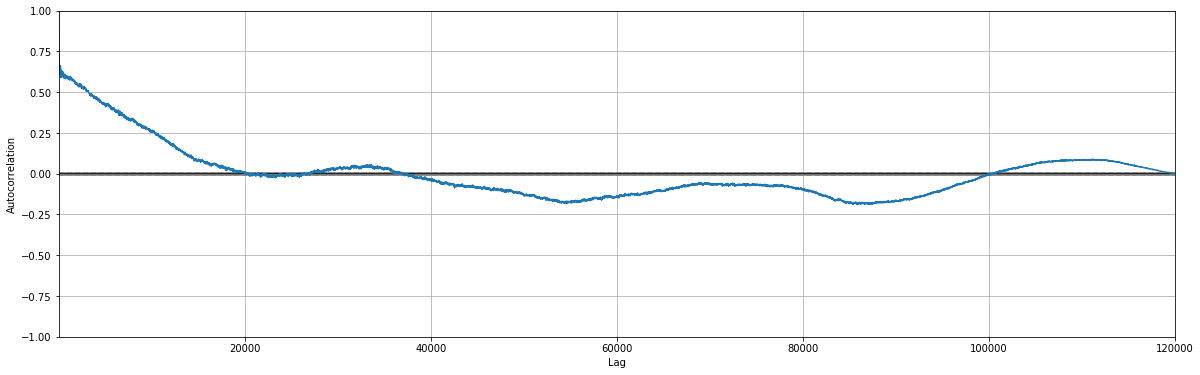

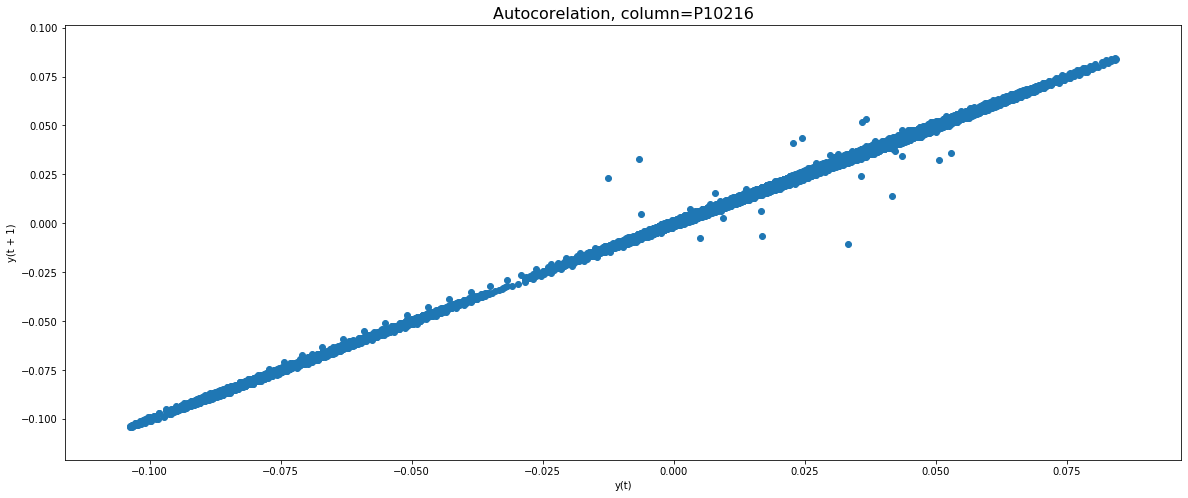

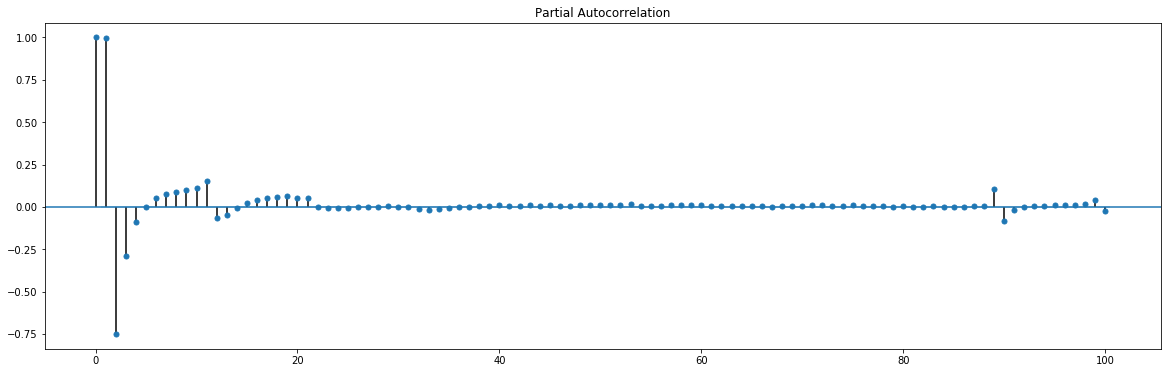

[1.         0.99968136 0.99887896 0.99762805 0.99597375 0.99396343
 0.99165158 0.98909653 0.98635362 0.98348608 0.98055055 0.97761849
 0.97471529 0.97187193 0.96911994 0.96648578 0.96399119 0.96165512
 0.95949351 0.95751353 0.95572515 0.95412939 0.95272288 0.95150112
 0.95045279 0.94956672 0.94882713 0.94821733 0.94771736 0.94730663
 0.9469629  0.94666449 0.94638982 0.94611762 0.94582738 0.94550152
 0.94512629 0.94468884 0.94418139 0.94359819 0.94293585]


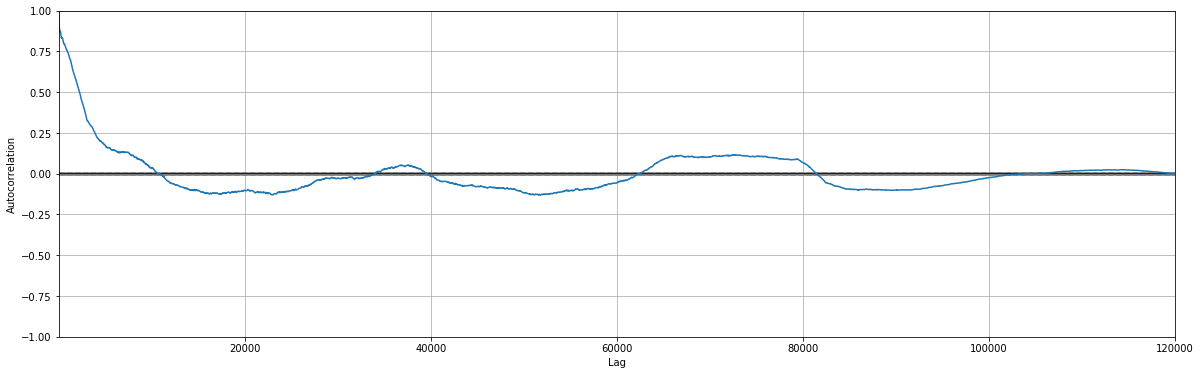

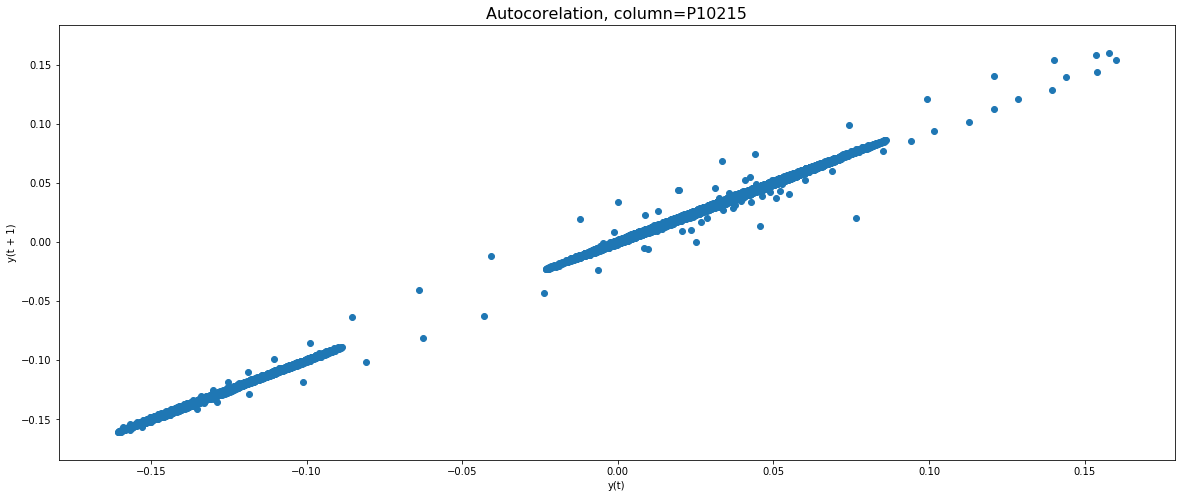

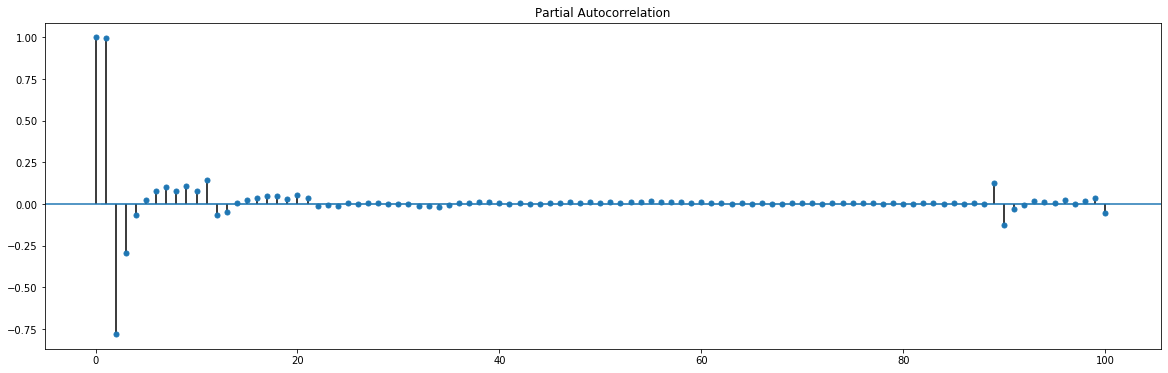

[1.         0.99945045 0.9984163  0.99697202 0.99518173 0.99310831
 0.99081017 0.98834626 0.98577577 0.98316015 0.98056546 0.97809073
 0.97569612 0.97337611 0.97112945 0.9689554  0.96685805 0.96484142
 0.96290808 0.96106234 0.9593058  0.95763922 0.9560622  0.95457282
 0.95317005 0.95185083 0.95060893 0.94943645 0.94832641 0.9472679
 0.94625478 0.94527971 0.94433345 0.94340563 0.94248626 0.94156671
 0.94063899 0.93969672 0.93873409 0.93774718 0.93673244]


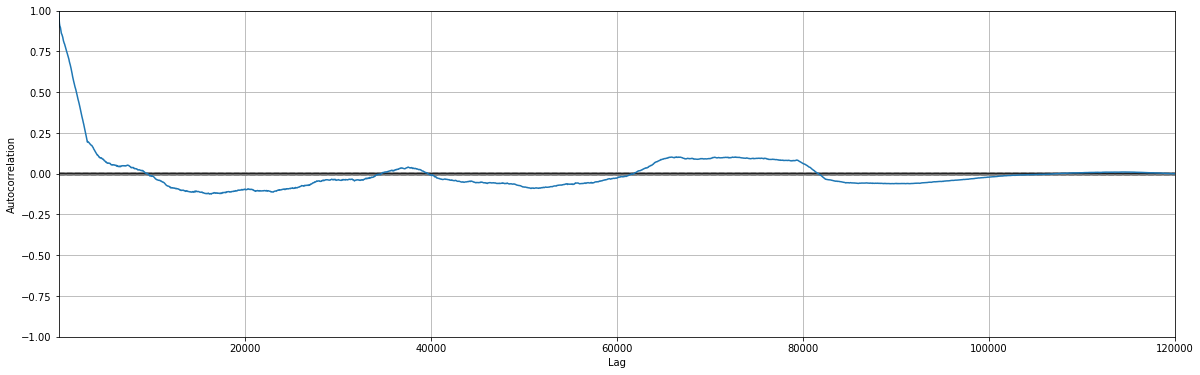

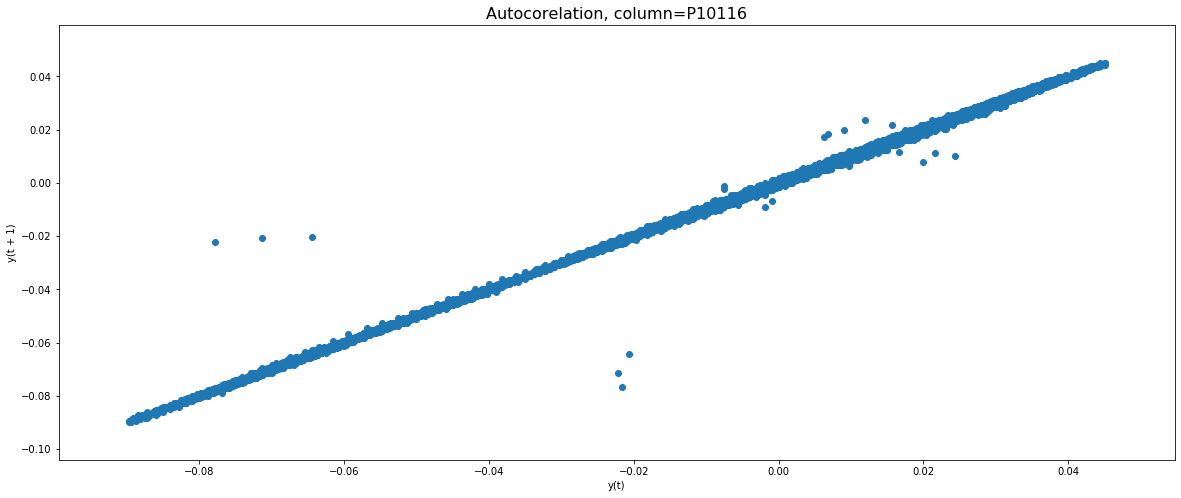

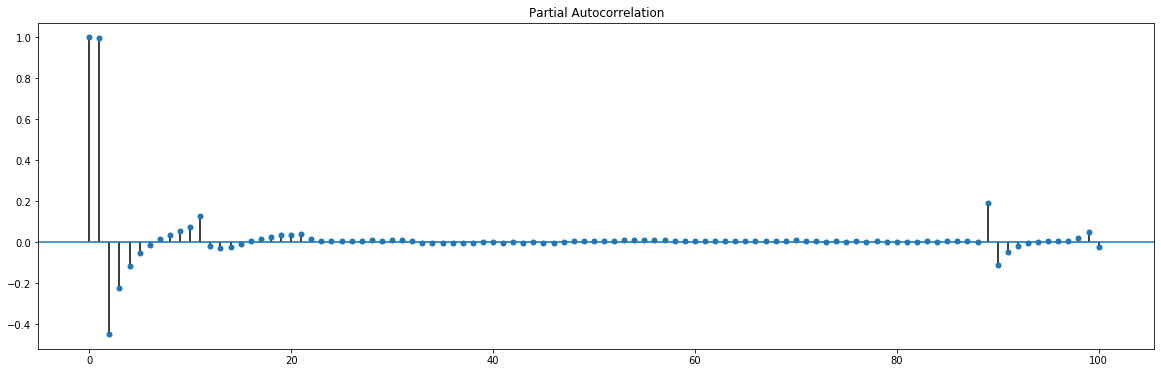

[1.         0.99943878 0.99838605 0.99691949 0.99510766 0.99301256
 0.99069267 0.98820598 0.98561392 0.98298261 0.98038029 0.97790494
 0.97551638 0.97320741 0.97097283 0.9688126  0.96673073 0.96473113
 0.9628188  0.96099622 0.95926332 0.95762429 0.95607849 0.95462269
 0.95325528 0.95197446 0.95077344 0.9496433  0.94857675 0.94756642
 0.946602   0.94567219 0.94476753 0.943881   0.94300244 0.9421213
 0.94123097 0.9403259  0.93939806 0.93844055 0.93745458]


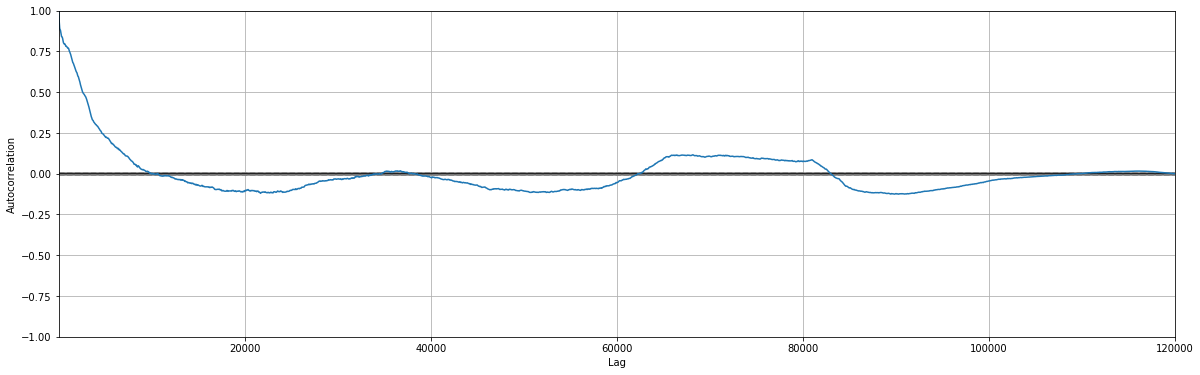

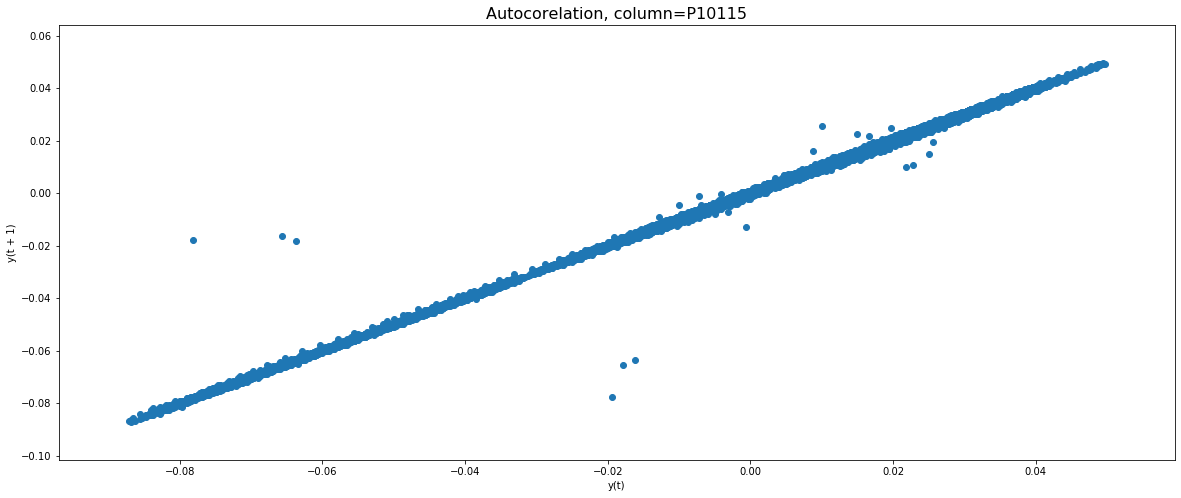

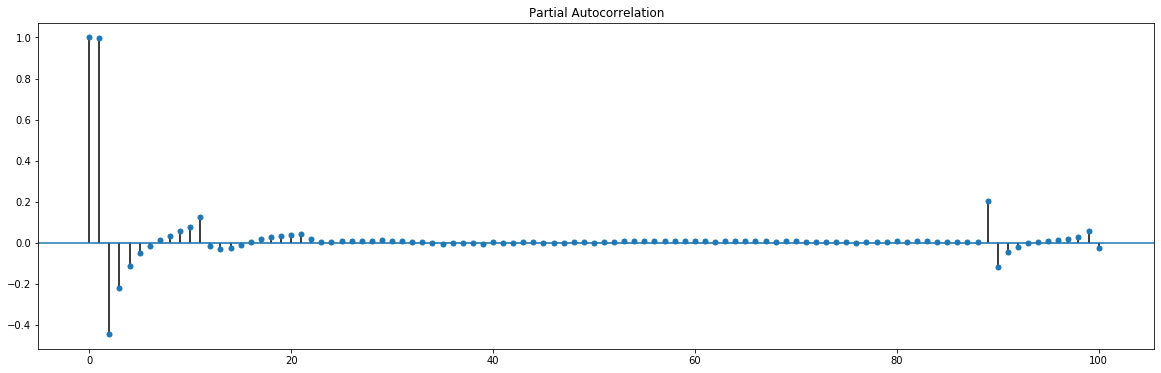

[1.         0.98476061 0.95853882 0.92813708 0.89559893 0.86250053
 0.82930952 0.79575551 0.76295643 0.73227164 0.70654194 0.69542206
 0.6897075  0.68542767 0.68188743 0.67871253 0.67510482 0.67149094
 0.66788579 0.66378608 0.6597112  0.65569443 0.65117698 0.64667704
 0.6422165  0.63718138 0.63204103 0.6269914  0.62152087 0.61617472
 0.61097975 0.60540162 0.59997755 0.59475827 0.58915283 0.58370532
 0.57859373 0.57300135 0.56738972 0.56182277 0.55576029]


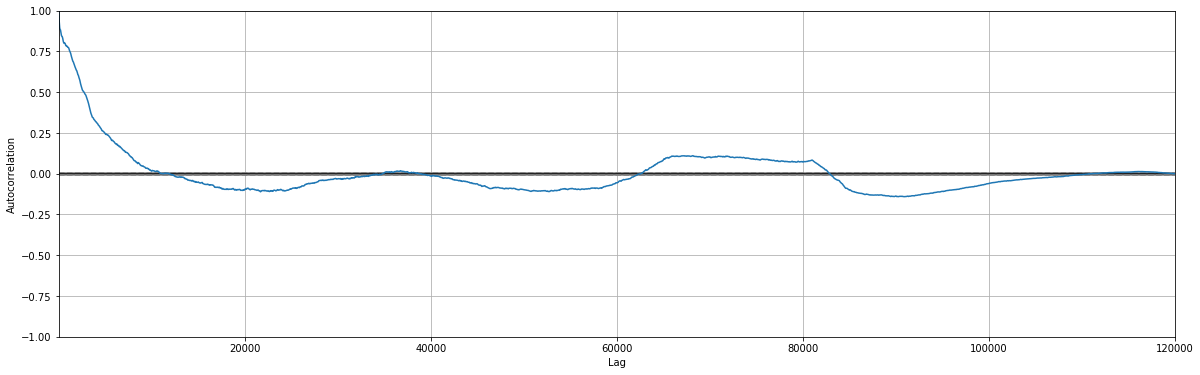

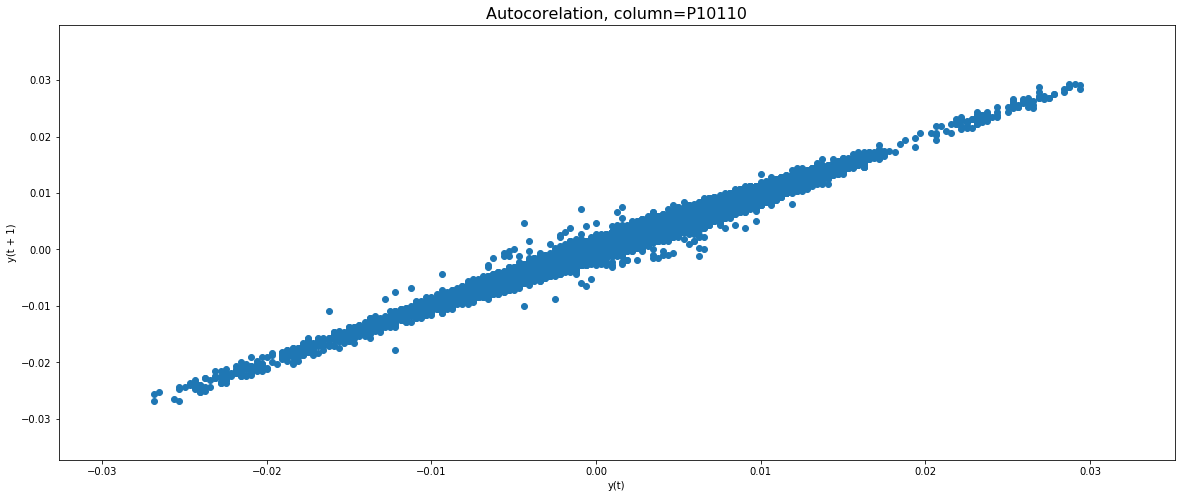

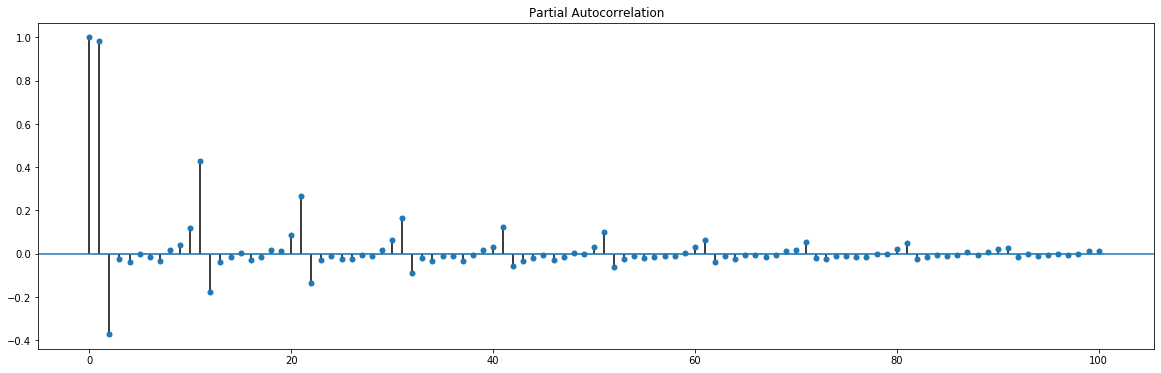

[1.         0.98564166 0.96091129 0.93215102 0.90126088 0.86961123
 0.83773489 0.80535873 0.77355889 0.74371595 0.71848393 0.70702721
 0.70042299 0.69490882 0.68983052 0.68502018 0.6797921  0.6748221
 0.67008684 0.66489913 0.65974614 0.65448072 0.64890125 0.64354333
 0.63847476 0.63301023 0.6275743  0.62202847 0.61586186 0.60972968
 0.60372795 0.59760541 0.59168664 0.58599279 0.58001632 0.57425642
 0.56876084 0.5630515  0.55765684 0.55245911 0.54685222]


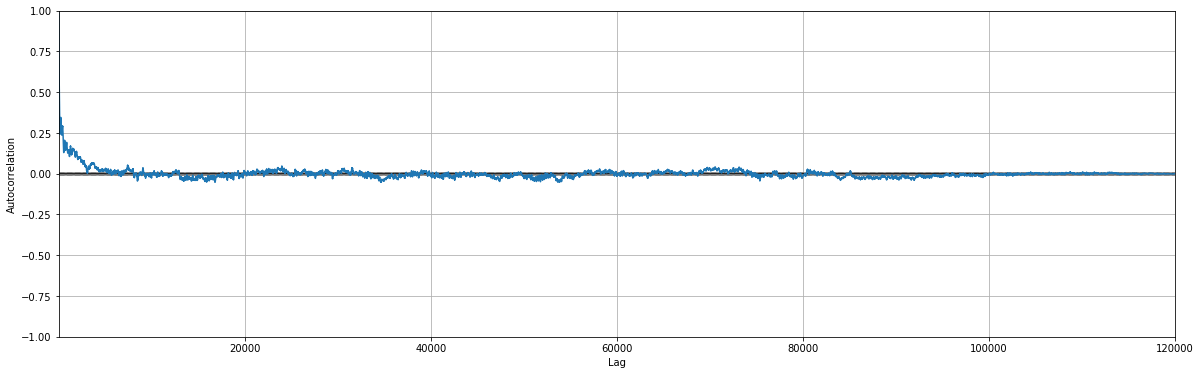

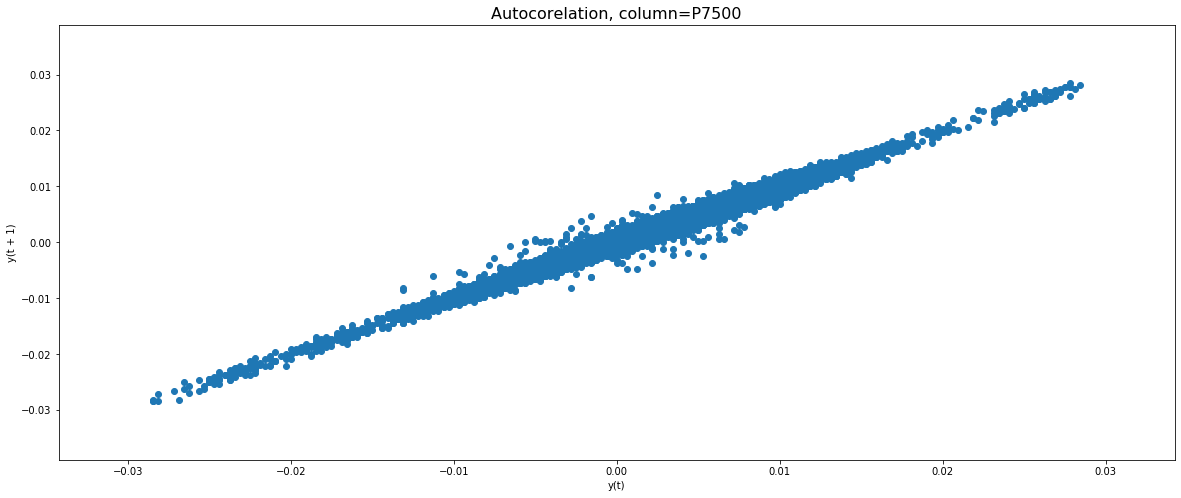

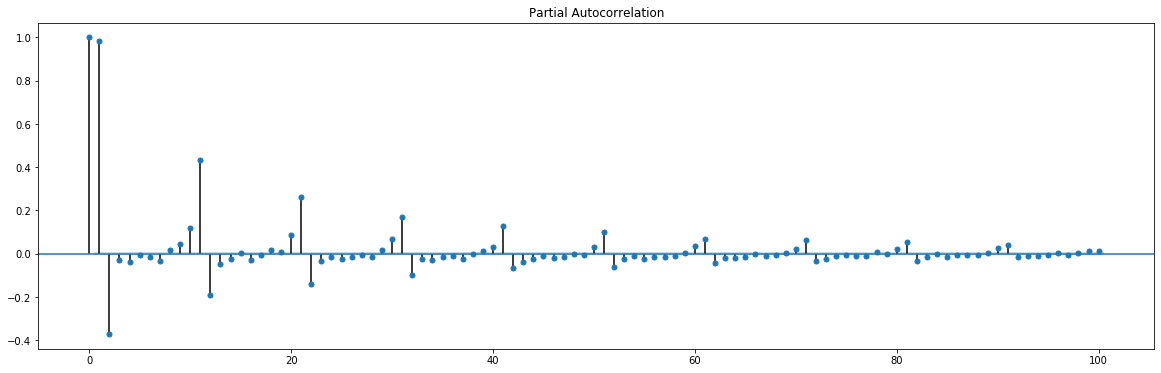

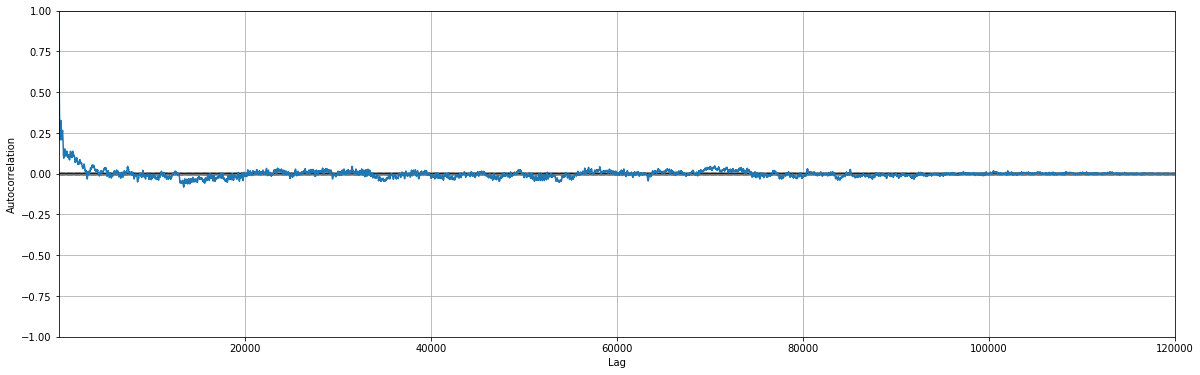

In [20]:
# Import the models we'll be using in this section
columns = df.columns
for column in columns[1:]:
    print(acf(df[column]))
    
    pl.figure(figsize=(20, 8))
    plt.title(f'Autocorelation, column={column}', size=16)
    lag_plot(df[column])    
    
    x = pd.DataFrame(df[str(column)])          
    fig, ax = plt.subplots(figsize=(20,6))
    plot_pacf(x, lags=100, ax=ax)
    pyplot.show()
    
    dfx = pd.DataFrame(df[str(column)])
    plt.figure(figsize=(20, 6))
    autocorrelation_plot(dfx) # [100:200] 
    
#     plot_acf(df[column],title='Autocorrelation: ' + column,lags=100)
